In [56]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [57]:
df = pd.read_csv('spam.csv',encoding='latin1')
df.head(5) 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [58]:
df.shape 

(5572, 5)

In [59]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## Data Cleaning 

In [60]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [61]:
df.isnull().sum() 

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [62]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [63]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [64]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
# Converting target column in numerical value.

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [67]:
encoder.fit(df['target'])

LabelEncoder()

In [68]:
df['target']=encoder.transform(df['target'])

In [69]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
# Check Missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [71]:
# Check Duplicate values
df.duplicated().sum()

403

In [72]:
# Remove duplicate
df.drop_duplicates(inplace=True)

## EDA(Exploratory Data Analysis)

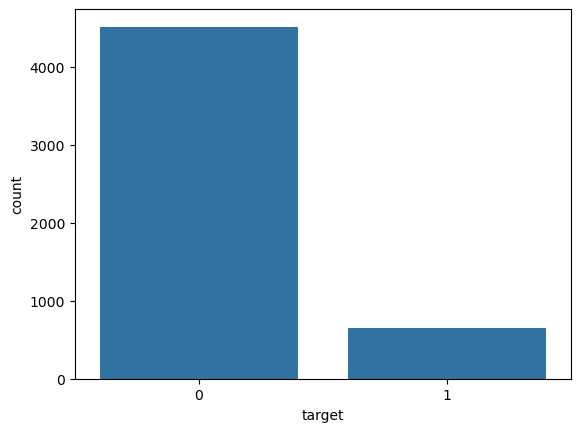

In [73]:
sns.countplot(data = df,x='target')
plt.show() 

In [74]:
df['target'].value_counts() 

target
0    4516
1     653
Name: count, dtype: int64

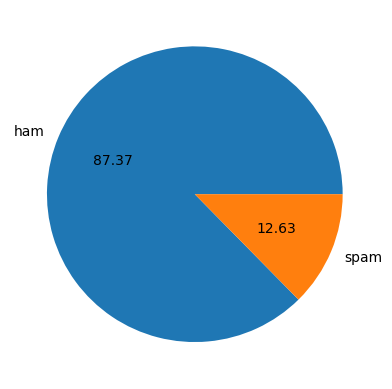

In [75]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show() 

In [76]:
# This show data is inbalanced means our model predict ham msg more accurate

In [77]:
import nltk

In [78]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohitmangla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
df['num_characters'] = df['text'].apply(len)

In [80]:
# Number of word
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x))) 

In [81]:
# Number of sentence
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x))) 

In [82]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [83]:
df[['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [84]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [85]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


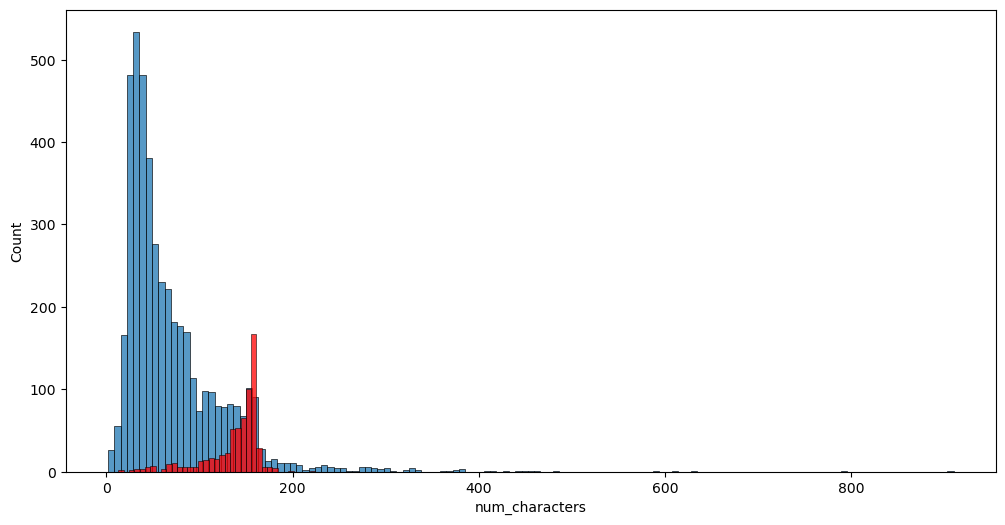

In [86]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.show() 

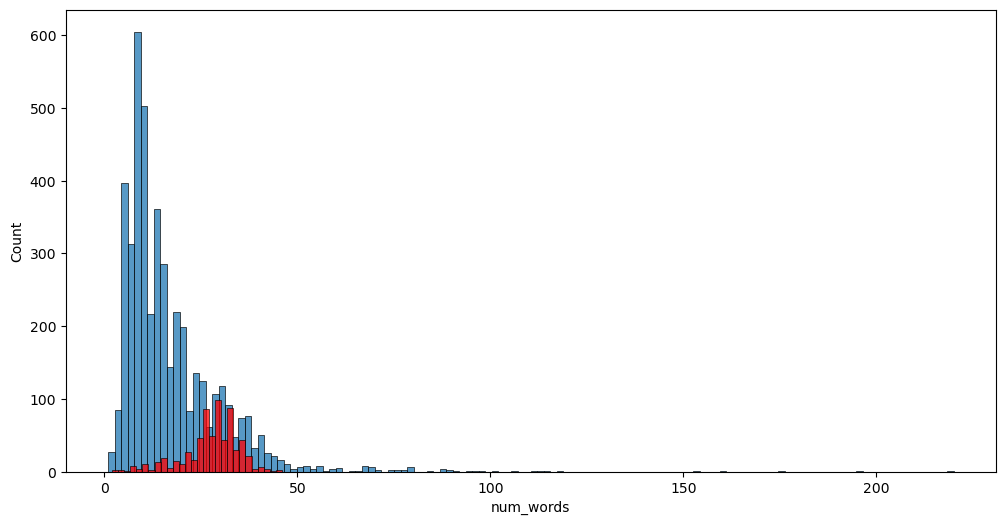

In [87]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show() 

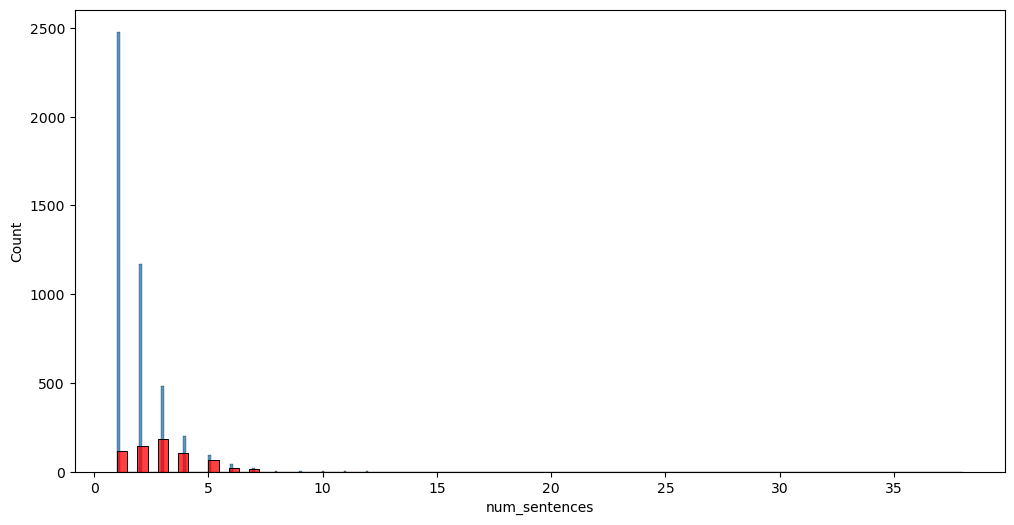

In [88]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')
plt.show()  

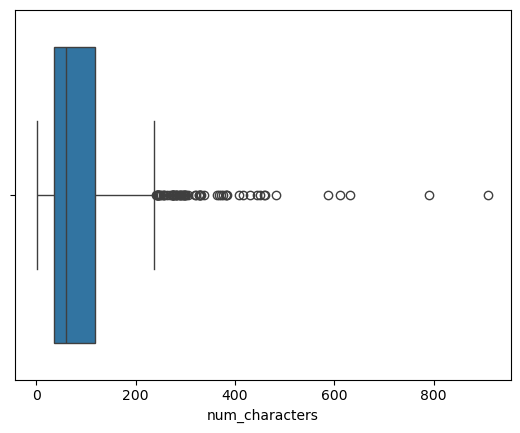

In [89]:
sns.boxplot(data=df,x='num_characters')
plt.show() 

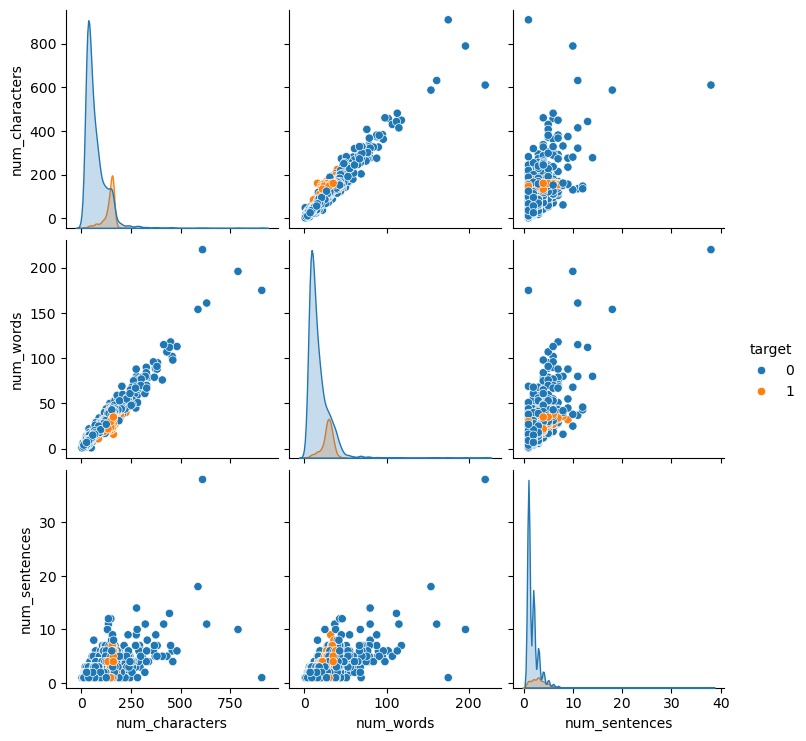

In [90]:
sns.pairplot(df,hue='target')
plt.show() 

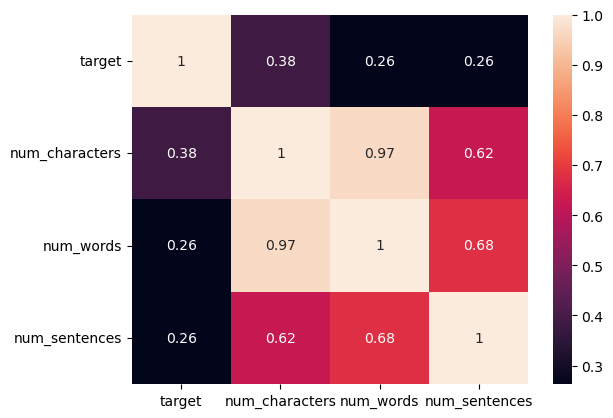

In [91]:
sns.heatmap(df.drop('text', axis=1).corr(),annot=True)
plt.show() 

## Data Preprocessing

In [92]:
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# Stemming

In [93]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [94]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() 

In [95]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [96]:
# transform_text('HI Surgery are you eating dancing THE The 20#')

In [97]:
df['transformed_text'] = df['text'].apply(transform_text)

In [98]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [99]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [100]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

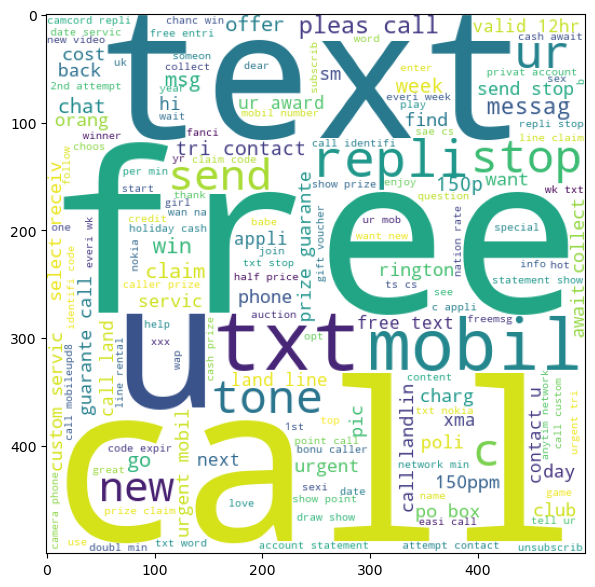

In [101]:
plt.figure(figsize=(14,7))
plt.imshow(spam_wc)

In [102]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

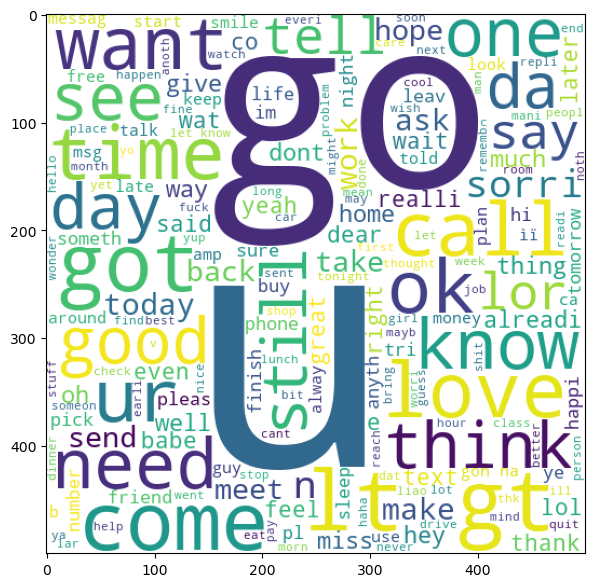

In [103]:
plt.figure(figsize=(14,7))
plt.imshow(ham_wc) 

In [104]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [105]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [106]:
len(spam_corpus)

9939

In [107]:
# pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

In [109]:
from collections import Counter

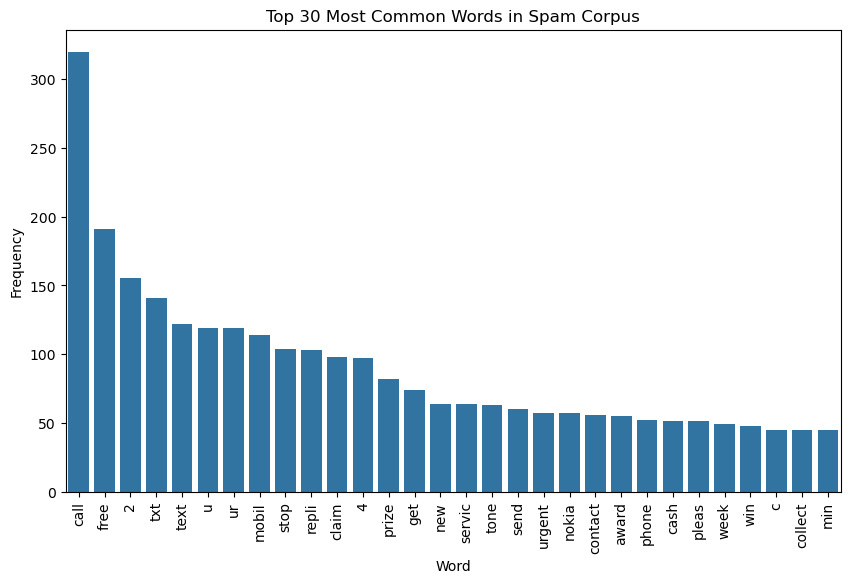

In [110]:
# Get the 30 most common words
most_common_words =  Counter(spam_corpus).most_common(30)

# Create a DataFrame from the most common words
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=df_most_common)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()

In [111]:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [112]:
len(ham_corpus) 

35404

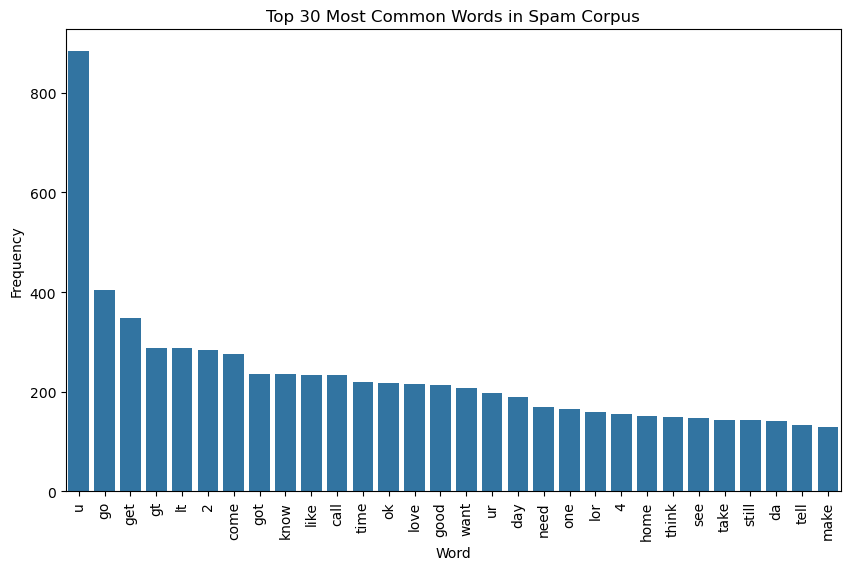

In [113]:
# Get the 30 most common words
most_common_words =  Counter(ham_corpus).most_common(30)

# Create a DataFrame from the most common words
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=df_most_common)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()

## Build Model

In [114]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [115]:
# X = cv.fit_transform(df['transformed_text']).toarray()

In [116]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [117]:
X.shape

(5169, 3000)

In [118]:
y = df['target'].values

In [119]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [121]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [122]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [123]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1)*100)
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1)*100)

86.94390715667312
[[788 108]
 [ 27 111]]
50.68493150684932


In [124]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2)*100)
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2)*100)

97.09864603481626
[[896   0]
 [ 30 108]]
100.0


In [125]:
bnb.fit(X_train,Y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2)*100)
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2)*100)

98.35589941972921
[[895   1]
 [ 16 122]]
99.1869918699187


In [126]:
# here is choose tfidf -- mnb because of high precision

In [127]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))